In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
functions = [
    {"func": lambda x: 0.5 / x, "a": 0.5, "b": 1, "name": "0.5/x", "color": "orange"},
    {"func": lambda x: x**2, "a": 0, "b": 1, "name": "x^2", "color": "green"},
    {"func": lambda x: np.sin(x), "a": 0, "b": np.pi, "name": "sin(x)", "color": "blue"},
    {"func": lambda x: np.exp(-x), "a": 0, "b": 2, "name": "exp(-x)", "color": "red"},
    {"func": lambda x: 2*x + 1, "a": 0, "b": 3, "name": "2x + 1", "color": "purple"}
]

for f in functions:
    x = np.linspace(f["a"], f["b"], 1000)
    y = f["func"](x)
    integral = np.trapz(y, x)
    print(f"∫ {f['name']} dx від {f['a']} до {f['b']} ≈ {integral:.5f}")

∫ 0.5/x dx від 0.5 до 1 ≈ 0.34657
∫ x^2 dx від 0 до 1 ≈ 0.33333
∫ sin(x) dx від 0 до 3.141592653589793 ≈ 2.00000
∫ exp(-x) dx від 0 до 2 ≈ 0.86467
∫ 2x + 1 dx від 0 до 3 ≈ 12.00000


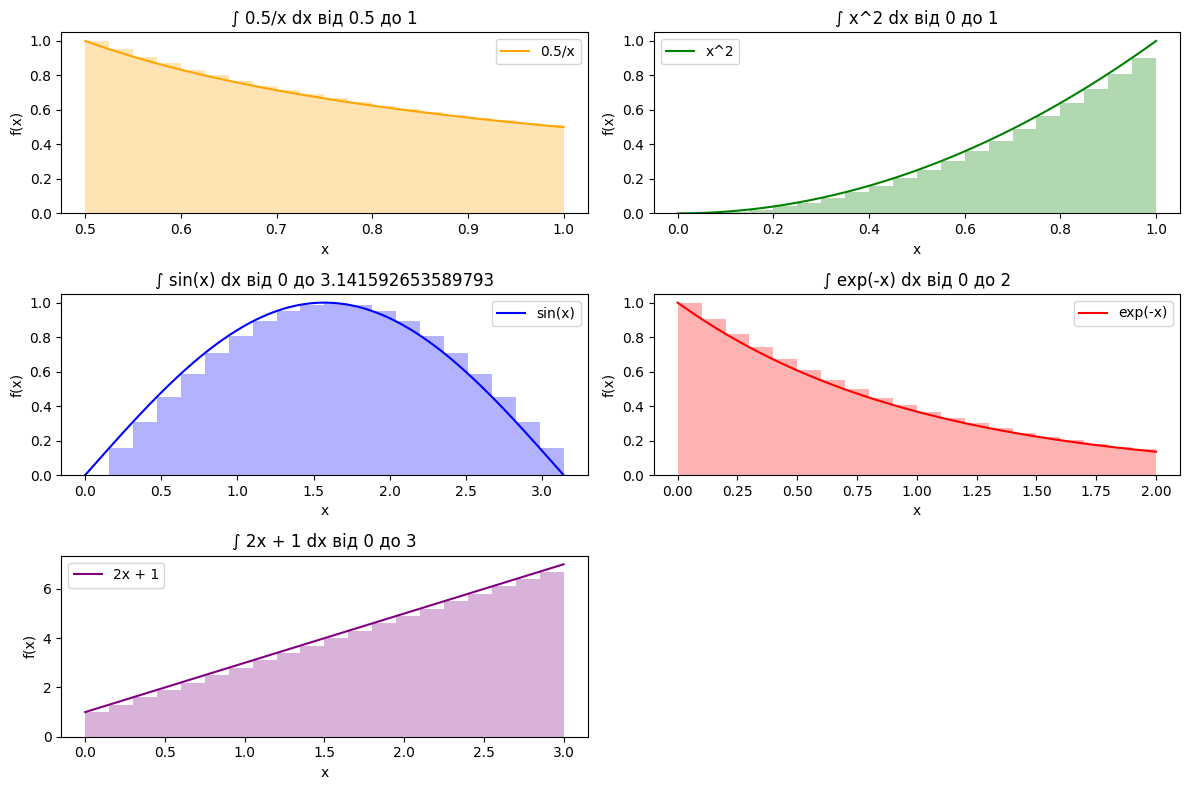

In [5]:
plt.figure(figsize=(12, 8))

for i, f in enumerate(functions, 1):
    x = np.linspace(f["a"], f["b"], 1000)
    y = f["func"](x)
    
    # Розбивка для смужок
    x_bar = np.linspace(f["a"], f["b"], 20, endpoint=False)
    y_bar = f["func"](x_bar)
    
    plt.subplot(3, 2, i)
    plt.plot(x, y, color=f["color"], label=f['name'])
    plt.bar(x_bar, y_bar, width=(f["b"]-f["a"])/20, alpha=0.3, color=f["color"], align='edge')
    plt.title(f'∫ {f["name"]} dx від {f["a"]} до {f["b"]}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()

plt.tight_layout()
plt.show()

Площа між x^2 і ідеальною діагоналлю ≈ 0.16667


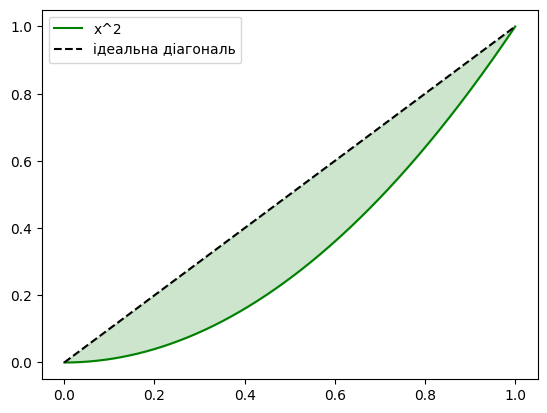

Площа між x^4 і ідеальною діагоналлю ≈ 0.30000


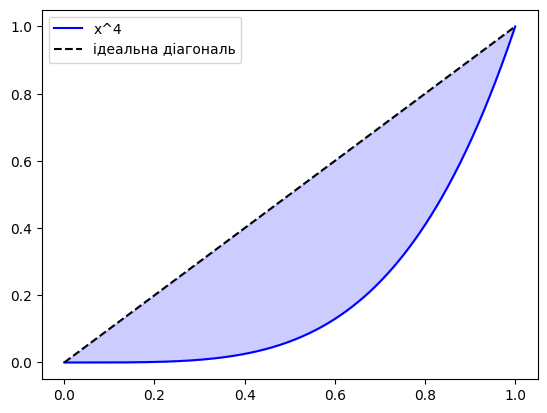

In [6]:
functions = [
    {"func": lambda x: x**2, "a": 0, "b": 1, "name": "x^2", "color": "green"},
    {"func": lambda x: x**4, "a": 0, "b": np.pi, "name": "x^4", "color": "blue"}
]

for f in functions:
    x = np.linspace(f["a"], f["b"], 1000)
    y = f["func"](x)
    
    # Нормалізація до [0,1] для порівняння з ідеальною діагоналлю
    y_norm = (y - y.min()) / (y.max() - y.min() + 1e-9)
    ideal_line = np.linspace(0, 1, len(y_norm))
    
    # Площа між кривою та ідеальною діагоналлю
    area_diff = np.trapz(np.abs(y_norm - ideal_line), ideal_line)
    print(f"Площа між {f['name']} і ідеальною діагоналлю ≈ {area_diff:.5f}")
    
    plt.plot(ideal_line, y_norm, color=f["color"], label=f'{f["name"]}')
    plt.plot(ideal_line, ideal_line, 'k--', label='ідеальна діагональ')
    plt.fill_between(ideal_line, y_norm, ideal_line, color=f["color"], alpha=0.2)
    plt.legend()
    plt.show()